<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada / M0.539 · Inteligencia Artificial</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## Código del capítulo 5: Optimización 

Código 5.1: función de Rosenbrock y su función gradiente

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 28 17:02:18 2017

@author: samir
"""

########################################################################
import numpy

# Funcion de Rosenbrock
def f(punto, *args):
    
    # Descomponer el punto y los parametros para manejarlos mejor
    x, y = punto
    a, b = args
    
    return (a - x)**2 + b*(y - x**2)**2

# Gradiente de la funcion de Rosenbrock
def gradf(punto, *args):

    x, y = punto
    a, b = args
    
    gfx = -2*(a - x) -4*b*(y - x**2)*x
    gfy = 2*b*(y - x**2)
    
    # El gradiente es un vector de 2 componentes, uno por variable
    return numpy.asarray((gfx, gfy))


Código 5.2: función de Rosenbrock y su función gradiente

In [ ]:
# Interesa probar con diferentes puntos iniciales
punto0 = numpy.asarray((0, 0)) 
#punto0 = numpy.asarray((1,0))

# Valores de los parametros a y b
args = (1, 100)

from scipy import optimize
res1 = optimize.fmin_cg(f, punto0, fprime=gradf, args=args)
print (res1)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 42
         Gradient evaluations: 42
[0.99999205 0.99998409]


Código 5.3: aproximación polinómica de una señal con salto de valles

Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

Cambiar de directorio de trabajo para cargar los datos:

In [ ]:
cd /content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/

/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb


In [ ]:
pwd

'/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb'

In [ ]:
import os
dataset_path = os.getcwd() + "/data/"

Error minimo: 1.0981070958046267e-09
Coeficientes: [-0.7880599   0.7286584   3.36156773 -1.65083981]


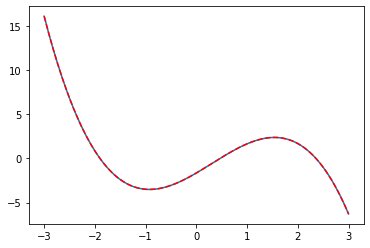

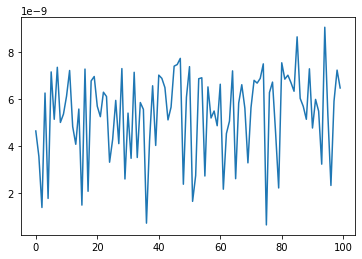

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 14 08:09:29 2014

@author: samir
"""



import matplotlib.pyplot as plot

#plot.figure()
#plot.plot(xVal, yVal)
#plot.show()

#yVal = polynomial([-0.8, 0.7, 3.4, -1.6])


import numpy

# Dominio de la funcion
xVal = numpy.linspace(-3, 3, 200)

yVal = numpy.loadtxt(dataset_path + '/signal.data')


# Funcion que aplica un polinomio en un dominio
def polinomio(coefs, dominio):
    a, b, c, d = coefs
    return numpy.array([a*x**3 + b*x**2 + c*x + d for x in dominio])


import math
from sklearn.metrics import mean_squared_error

def objetivo(solution):
    return math.sqrt(mean_squared_error(yVal, 
                polinomio(solution, xVal)))/(max(yVal) - min(yVal))

 
from scipy.optimize import basinhopping

# Initial guess: let it be random (4 parameters in solution)
from random import random
punto0 = [random()*2-1 for i in range(4)]

opti = basinhopping(func=objetivo, x0=punto0, niter=100)    

print('Error minimo:', opti.fun)
print('Coeficientes:', opti.x)


plot.figure()
plot.plot(xVal, yVal)
plot.plot(xVal, polinomio(opti.x, xVal), c='red', ls='dashed')
plot.show()
             

# Capture error on iterations

minimos = []

def registro(x, f, accepted):
    minimos.append(f)

opti = basinhopping(func=objetivo, x0=punto0, niter=100, callback=registro)    


plot.figure()
plot.plot(minimos)
plot.show()

Código 5.4: algoritmo de la colonia de hormigas

In [ ]:
# -*- coding: utf-8 -*-
import random, sys, math

# Nota: en lugar de matrices se usan listas de listas

# Genera una matriz de distancias de nCiudades x nCiudades
def matrizDistancias(nCiud, distanciaMaxima):
    matriz = [[0 for i in range(nCiud)] for j in range(nCiud)]

    for i in range(nCiud):
        for j in range(i):
            matriz[i][j] = distanciaMaxima*random.random()       
            matriz[j][i] = matriz[i][j]

    return matriz

# Elige un paso de una hormiga, teniendo en cuenta las distancias 
# y las feromonas y descartando las ciudades ya visitadas.
def eligeCiudad(dists, ferom, visitadas):
    # Se calcula la tabla de pesos de cada ciudad
    listaPesos  = []
    disponibles = []
    actual      = visitadas[-1]

    # Influencia de cada valor (alfa: feromonas; beta: distancias)
    alfa = 1.0
    beta = 0.5

    # El parametro beta (peso de las distancias) es 0.5, alfa=1.0
    for i in range(len(dists)):
        if i not in visitadas:
            fer  = math.pow((1.0 + ferom[actual][i]), alfa)
            peso = math.pow(1.0/dists[actual][i], beta) * fer
            disponibles.append(i)
            listaPesos.append(peso)

    # Se elige aleatoriamente una de las ciudades disponibles,
    # teniendo en cuenta su peso relativo. 
    valor     = random.random() * sum(listaPesos)
    acumulado = 0.0
    i         = -1
    while valor > acumulado:
        i         += 1
        acumulado += listaPesos[i]

    return disponibles[i]    


# Genera una "hormiga", que elegira un camino teniendo en cuenta
# las distancias y los rastros de feromonas. Devuelve una tupla
# con el camino y su longitud.
def eligeCamino(distancias, feromonas):
    # La ciudad inicial siempre es la 0
    camino     = [0]
    longCamino = 0

    # Elegir cada paso segun la distancia y las feromonas
    while len(camino) < len(distancias):
        ciudad      = eligeCiudad(distancias, feromonas, camino)
        longCamino += distancias[camino[-1]][ciudad]
        camino.append(ciudad)

    # Para terminar hay que volver a la ciudad de origen (0)
    longCamino += distancias[camino[-1]][0]
    camino.append(0)
    
    return (camino, longCamino)

# Actualiza la matriz de feromonas siguiendo el camino recibido
def rastroFeromonas(feromonas, camino, dosis):
    for i in range(len(camino) - 1):
        feromonas[camino[i]][camino[i+1]] += dosis

# Evapora todas las feromonas multiplicandolas por una constante
# = 0.9 (en otras palabras, el coeficiente de evaporación es 0.1)
def evaporaFeromonas(feromonas):
    for lista in feromonas:
        for i in range(len(lista)):
            lista[i] *= 0.9

# Resuelve el problema del viajante de comercio mediante el
# algoritmo de la colonia de hormigas. Recibe una matriz de
# distancias y devuelve una tupla con el mejor camino que ha
# obtenido (lista de indices) y su longitud
def hormigas(distancias, iteraciones, distMedia):
    # Primero se crea una matriz de feromonas vacia
    n = len(distancias)
    feromonas = [[0 for i in range(n)] for j in range(n)]

    # El mejor camino y su longitud (inicialmente "infinita")
    mejorCamino     = []
    longMejorCamino = sys.maxsize

    # En cada iteracion se genera una hormiga, que elige un camino,
    # y si es mejor que el mejor que teniamos, deja su rastro de
    # feromonas (mayor cuanto más corto sea el camino)
    for iter in range(iteraciones):
        (camino,longCamino) = eligeCamino(distancias, feromonas)

        if longCamino <= longMejorCamino:
            mejorCamino     = camino
            longMejorCamino = longCamino
        
        rastroFeromonas(feromonas, camino, distMedia/longCamino)

        # En cualquier caso, las feromonas se van evaporando
        evaporaFeromonas(feromonas)


    # Se devuelve el mejor camino que se haya encontrado
    return (mejorCamino, longMejorCamino)


# Generacion de una matriz de prueba
numCiudades     = 10
distanciaMaxima = 10
ciudades        = matrizDistancias(numCiudades, distanciaMaxima)

# Obtencion del mejor camino
iteraciones = 1000
distMedia   = numCiudades*distanciaMaxima/2
(camino, longCamino) = hormigas(ciudades, iteraciones, distMedia)
print("Camino: ", camino)
print("Longitud del camino: ", longCamino)

Camino:  [0, 4, 7, 8, 2, 5, 9, 6, 3, 1, 0]
Longitud del camino:  15.609334837661532


Código 5.5: algoritmo del enjambre de partículas

In [ ]:
# -*- coding: utf-8 -*-
from random import random

# Funcion que se quiere minimizar
def funcion(x, y):
    sum1 = x**2 * (4-2.1*x**2 + x**4/3.0)
    sum2 = x*y
    sum3 = y**2 * (-4+4*y**2)
    return sum1 + sum2 + sum3


# Devuelve un numero aleatorio dentro de un rango con
# distribucion uniforme (proporcionada por random)
def aleatorio(inf, sup):
    return random()*(sup-inf) + inf


# Clase que representa una particula individual y que facilita
# las operaciones necesarias
class Particula:
    # Algunos atributos de clase (comunes a todas las particulas)
    # Parametros para actualizar la velocidad
    inercia     = 1.4
    cognitiva   = 2.0
    social      = 2.0
    # Limites del espacio de soluciones
    infx = -2.0
    supx =  2.0
    infy = -1.0
    supy =  1.0
    # Factor de ajuste de la velocidad inicial
    ajusteV = 100.0
        
    # Crea una particula dentro de los limites indicados
    def __init__(self):
        self.x  = aleatorio(Particula.infx, Particula.supx)
        self.y  = aleatorio(Particula.infy, Particula.supy)
        self.vx = aleatorio(Particula.infx/Particula.ajusteV,
                            Particula.supx/Particula.ajusteV)
        self.vy = aleatorio(Particula.infy/Particula.ajusteV,
                            Particula.supy/Particula.ajusteV)
        self.xLoc     = self.x
        self.yLoc     = self.y
        self.valorLoc = funcion(self.x, self.y)

    # Actualiza la velocidad de la particula
    def actualizaVelocidad(self, xGlob, yGlob):
        cogX    = Particula.cognitiva*random()*(self.xLoc-self.x)
        socX    = Particula.social*random()*(xGlob-self.x)
        self.vx = Particula.inercia*self.vx + cogX + socX
        cogY    = Particula.cognitiva*random()*(self.yLoc-self.y)
        socY    = Particula.social*random()*(yGlob-self.x)
        self.vy = Particula.inercia*self.vy + cogY + socY

    # Actualiza la posicion de la particula
    def actualizaPosicion(self):
        self.x = self.x + self.vx
        self.y = self.y + self.vy

        # Debe mantenerse dentro del espacio de soluciones
        self.x = max(self.x, Particula.infx)
        self.x = min(self.x, Particula.supx)
        self.y = max(self.y, Particula.infy)
        self.y = min(self.y, Particula.supy)

        # Si es inferior a la mejor, la adopta como mejor
        valor = funcion(self.x, self.y)
        if valor < self.valorLoc:
            self.xLoc     = self.x
            self.yLoc     = self.y
            self.valorLoc = valor

    
# Mueve un enjambre de particulas durante las iteraciones indicadas.
# Devuelve las coordenadas y el valor del minimo obtenido.
def enjambreParticulas(particulas, iteraciones, reduccionInercia):

    # Registra la mejor posicion global y su valor
    mejorParticula = min(particulas, key=lambda p:p.valorLoc)
    xGlob     = mejorParticula.xLoc
    yGlob     = mejorParticula.yLoc
    valorGlob = mejorParticula.valorLoc

    # Bucle principal de simulacion
    for iter in range(iteraciones):
        # Actualiza la velocidad y posicion de cada particula
        for p in particulas:
            p.actualizaVelocidad(xGlob, yGlob)
            p.actualizaPosicion()

        # Hasta que no se han movido todas las particulas no se
        # actualiza el minimo global, para simular que todas se 
        # mueven a la vez
        mejorParticula = min(particulas, key=lambda p:p.valorLoc)
        if mejorParticula.valorLoc < valorGlob:
            xGlob     = mejorParticula.xLoc
            yGlob     = mejorParticula.yLoc
            valorGlob = mejorParticula.valorLoc

        # Finalmente se reduce la inercia de las particulas
        Particula.inercia*=reduccionInercia

    return (xGlob, yGlob, valorGlob)


# Parametros del problema
nParticulas = 10
iteraciones = 100
redInercia  = 0.9

# Genera un conjunto inicial de particulas
particulas=[Particula() for i in range(nParticulas)]

# Ejecuta el algoritmo del enjambre de particulas
print(enjambreParticulas(particulas, iteraciones, redInercia))


(-0.08953075905154309, 0.7107488974546601, -1.0315989519050357)


Código 5.6: coloreado de mapas con búsqueda tabú

In [ ]:
# -*- coding: utf-8 -*-
# Nota: los grafos se representan como listas de listas
from random import randint, random, sample
 
# Dados dos nodos, devuelve 1 si estan conectados, 0 si no
def conectados(grafo, nodo1, nodo2):
    if nodo1 < nodo2:
        nodo1, nodo2 = nodo2, nodo1
    if nodo1 == nodo2:
        return 0
    else:
        return grafo[nodo1][nodo2]


# Funcion objetivo, que cuenta los vertices conectados que tienen
# el mismo color
def objetivo(grafo, estado):
    suma = 0
    for i in range(len(estado)-1):
        for j in range(i+1,len(estado)):
            if estado[i] == estado[j]:
                suma += conectados(grafo, i, j)
    return suma  

# Devuelve una lista con los vertices que tienen algun problema
# (estan conectados a otro del mismo color)
def verticesProblema(grafo, estado):
    nVertices = len(estado)
    vertices  = []
    for i in range(nVertices):
        encontrado = False
        j = 0
        while j<nVertices and not encontrado:
            if (estado[i]==estado[j]) and conectados(grafo, i, j):
                encontrado = True
            j += 1
        if encontrado:
            vertices.append(i)
    return vertices

# Genera la lista de vecinos de un estado y devuelve el
# mejor de ellos, teniendo en cuenta la informacion tabu y
# actualizandola para anotar el cambio de estado producido.
def vecino(grafo, estado, k, tabu, iterTabu):
    # En primer lugar se obtienen todos los vertices 
    # conectados a algun otro vertice del mismo color
    vertices = verticesProblema(grafo, estado)

    # Para cada uno de esos pares, se propone una
    # nueva solucion consistente en cambiar el color de uno de
    # los vertices (comprobando que no tome un color tabu).
    candidatos = []
    for v in vertices:
        # Si quedan colores disponibles para ese vertice
        if len(tabu[v]) < k:
            nuevoColor = randint(1,k)
            while nuevoColor in tabu[v]:
                nuevoColor = randint(1,k)
            nuevoEstado    = estado[:]
            nuevoEstado[v] = nuevoColor
            candidatos.append(nuevoEstado)

    # Se devuelve el mejor estado obtenido (funcion objetivo menor).
    # Si no hay soluciones posibles (los vertices problematicos 
    # tienen todos los colores en tabu) se devuelve un cambio al 
    # azar para desbloquear la situacion.
    if len(candidatos) > 0:
        elegido  = min(candidatos, key=lambda e:objetivo(grafo,e))
        posicion = candidatos.index(elegido)
        cambiado = vertices[posicion]
    else:
        elegido  = estado[:]
        cambiado = sample(vertices, 1)[0]
        elegido[cambiado] = randint(1, k)

    # Se añade el cambio a la lista tabu.
    tabu[cambiado][estado[cambiado]] = iterTabu
    return elegido


# Actualiza la informacion tabu, descontando una iteracion de 
# todas las entradas y eliminando las que llegan a 0
def actualizaTabu(tabu):
    for tabuVertice in tabu:
        for color in tabuVertice.keys():
            tabuVertice[color] -= 1
        claves = [c for c,v in tabuVertice.items() if v<=0]
        for c in claves:
            del tabuVertice[c]


# Dados un grafo, una asignacion inicial y un numero de colores,
# busca una asignacion optima utilizando busqueda tabu.
# Tambien hay que indicar el numero maximo de iteraciones, asi
# como el numero de iteraciones que se mantiene un color en tabu.
def busquedaTabu(grafo, asignacion, k, iteraciones, iterTabu):

    estado    = asignacion[:]
    mejor     = estado[:]
    nVertices = len(estado)

    # La estructura "tabu" almacena, para cada vertice (posiciones
    # en la lista), los colores  que tiene prohibidos (claves de  
    # cada diccionario) y durante cuantas iteraciones lo estaran 
    # (valores de cada diccionario)
    tabu = [{} for n in range(nVertices)]
    i = 0
    while i < iteraciones and objetivo(grafo, estado) > 0:

        # Selecciona el mejor vecino del estado actual
        estado = vecino(grafo, estado, k, tabu, iterTabu)

        if objetivo(grafo,estado)<objetivo(grafo,mejor):
            mejor = estado[:]
        print(i,objetivo(grafo,estado), objetivo(grafo,mejor))

        # Actualiza los estados tabu (descuenta una iteracion)
        actualizaTabu(tabu)

        # Avanza a la siguiente iteracion
        i += 1

    return mejor


# Genera un grafo en forma de matriz de conectividad, con un numero
# de vertices y una probabilidad de contacto entre dos vertices.
# Devuelve la mitad inferior de la matriz como lista de listas.
def generaGrafo(nVertices, probContacto):
    resultado = []
    for i in range(nVertices):
        # 1 si el numero aleatorio es menor o igual que
        # la probabilidad de contacto, 0 si no
        f = lambda : random()<=probContacto and 1 or 0
        resultado.append([f() for j in range(i)])

    return resultado    


# Programa principal

# Ejemplo: grafo que representa Sudamerica (no se resuelve)
sudamerica = [[],
             [1],
             [0,1],
             [0,0,1],
             [0,0,0,1],
             [1,0,0,0,0],
             [1,1,1,1,1,0],
             [1,0,0,0,0,1,1],
             [0,0,0,0,0,0,1,1],
             [0,0,0,0,0,0,0,1,1],
             [0,0,0,0,0,0,1,0,1,0],
             [0,0,0,0,0,0,1,0,1,1,1],
             [0,0,0,0,0,0,1,0,0,0,0,1]]

# Generacion de un grafo aleatorio.
# Parametros del problema: numero de paises y probabilidad
# de que dos paises cualesquiera sean linderos.
# Logicamente, cuantos mas paises haya, mayor numero de
# contactos tendra un pais determinado.
nPaises      = 13
probContacto = 0.05
mapa         = generaGrafo(nPaises,probContacto)

# Ejecucion del algoritmo: numero maximo de iteraciones del 
# algoritmo y numero que iteraciones que permanece un color 
# como tabu para un pais dado.
iteraciones = 200
iterTabu    = 15

# Numero de colores
k=4

# Se crea un estado inicial aleatoriamente
estado = [randint(1,k) for i in range(nPaises)]

# Se ejecuta la busqueda tabu con k colores.
solucion = busquedaTabu(sudamerica, estado, k, iteraciones, iterTabu)
print('Solucion:' + str(solucion))
print('Colisiones=' + str(objetivo(sudamerica, solucion)))


0 2 2
1 1 1
2 2 1
3 2 1
4 2 1
5 1 1
6 1 1
7 1 1
8 1 1
9 1 1
10 2 1
11 2 1
12 2 1
13 1 1
14 1 1
15 2 1
16 1 1
17 1 1
18 1 1
19 1 1
20 1 1
21 0 0
Solucion:[2, 1, 2, 4, 1, 3, 3, 4, 1, 3, 4, 2, 1]
Colisiones=0
